## Libraries

In [31]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import matplotlib as matl
import os
import tweepy
import pandas as pd
import numpy as np
import re
from  tqdm import tqdm
from langdetect import detect
import string
import nltk.data
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
import datetime
!pip install empath
from empath import Empath
!pip install textblob
import textblob as tb

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\potta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\potta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\potta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\potta\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## Loaded the Events start and end date of individual country

In [2]:
countries_lockdowndata = pd.read_csv(r'..\2020_05_10\Summary_stats_all_locs.csv')
countries_lockdowndata = countries_lockdowndata[['location_name','travel_limit_start_date', 'travel_limit_end_date',\
       'stay_home_start_date', 'stay_home_end_date',\
       'educational_fac_start_date', 'educational_fac_end_date',\
       'any_gathering_restrict_start_date', 'any_gathering_restrict_end_date',\
       'any_business_start_date', 'any_business_end_date',\
       'all_non-ess_business_start_date', 'all_non-ess_business_end_date']]

## loading the Tweets data from the multiple files

In [5]:
def load_data_fromfile(file):
    data = pd.read_csv(file,sep=',',encoding='utf8',engine='python')
    return data

def fetch_file_fromdir(directory):
    df = pd.DataFrame({'tweet' : []})
    for file_path in tqdm(os.listdir(directory),desc=os.path.basename(directory)):
        df1 = load_data_fromfile(os.path.join(directory, file_path))
        df = pd.concat([df,df1],sort=True).reset_index(drop=True,)
    return df

def load_dataset(directory):
    train_df = fetch_file_fromdir(os.path.join(os.getcwd(),directory))
    return train_df

def Dateformatter(df):
    for index,row in df.iterrows():
        try:
            df.loc[index,'Date'] = pd.to_datetime(row['Date'],dayfirst=True)
        except:
            df.drop(index,inplace=True)
    return df

In [6]:
tweet_df = load_dataset('new_train_data')
tweet_df.drop('Unnamed: 0',axis=1,inplace=True)
tweet_df = Dateformatter(tweet_df)

new_train_data: 100%|██████████████████████████████████████████████████████████████████| 30/30 [00:18<00:00,  1.58it/s]


## Distilling Only English Tweets

In [8]:
tweet_df.to_csv('englishtweetMar20_M22.csv')

In [9]:
def distill_english(text):
    try:
        op = detect(text)
    except:
        op = 'ran'
    return op

In [10]:
tweet_df = tweet_df[tweet_df.apply(lambda x: distill_english(x['tweet'])=='en', axis=1)]
tweet_df.reset_index(drop=True)
tweet_df.loc[:,'location'] = tweet_df.loc[:,'location'].str.lower()
tweet_df['sentiment'] = tweet_df['sentiment'].astype('float64',copy=True)
tweet_df.to_csv('englishtweetMar20_M22_en.csv')

## classifying and plot three classes and there weightage

In [7]:
def ClassifyTweet(df):
    for index,row in df.iterrows():
        value = row['sentiment']
        if value > 0.0 :
            df.loc[index,'sent_class'] = 'pos'
        elif value < 0.0 :
            df.loc[index,'sent_class'] = 'neg'
        else:
            df.loc[index,'sent_class'] = 'neut'
    return df

In [3]:
classifiy_tweet_df = pd.read_csv('englishtweetMar20_M22_wClass.csv')
classifiy_tweet_df['sentiment'] = classifiy_tweet_df['sentiment'].astype('float64',copy=True)

In [41]:
def weekclassification(df):
    for index,row in df.iterrows():  
        date = row['Date']
        if date < '2020-03-22':
            df.loc[index,'week'] = 'Week 12'
        elif date >= '2020-03-23' and date <= '2020-03-29':
            df.loc[index,'week'] = 'week_13'
        elif date >= '2020-03-30' and date <= '2020-04-05':
            df.loc[index,'week'] = 'week_14'
        elif date >= '2020-04-06' and date <= '2020-04-12':
            df.loc[index,'week'] = 'week_15'
        elif date >= '2020-04-13' and date <= '2020-04-19':
            df.loc[index,'week'] = 'week_16'    
        elif date >= '2020-04-20' and date <= '2020-04-26':
            df.loc[index,'week'] = 'week_17'
        elif date >= '2020-04-27' and date <= '2020-05-03':
            df.loc[index,'week'] = 'week_18'
        elif date >= '2020-05-04' and date <= '2020-05-10':
            df.loc[index,'week'] = 'week_19'
        elif date >= '2020-05-11' and date <= '2020-05-17':
            df.loc[index,'week'] = 'week_20'       
        elif date >= '2020-05-18' and date <= '2020-05-24':
            df.loc[index,'week'] = 'week_21'   
        elif date >= '2020-05-25' and date <= '2020-05-31':
            df.loc[index,'week'] = 'week_22' 
    return df

In [42]:
weekclassification(classifiy_tweet_df.iloc[60000:60020])

2020-05-09 02:44:28+00:00
2020-05-08 13:18:02+00:00
2020-05-08 10:06:09+00:00
2020-05-08 20:30:00+00:00
2020-05-08 18:58:39+00:00
2020-05-08 21:39:57+00:00
2020-05-08 21:11:08+00:00
2020-05-09 00:25:31+00:00
2020-05-08 19:54:13+00:00
2020-05-09 03:19:40+00:00
2020-05-08 09:44:17+00:00
2020-05-08 05:14:35+00:00
2020-05-08 21:47:07+00:00
2020-05-08 11:57:43+00:00
2020-05-08 21:45:51+00:00
2020-05-08 10:23:04+00:00
2020-05-08 10:07:54+00:00
2020-05-08 09:36:39+00:00
2020-05-09 02:35:11+00:00
2020-05-09 03:13:28+00:00


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Date,hashtags,location,sentiment,tweet,tweet_id,sent_class,week
60000,60000,68455,68457,2020-05-09 02:44:28+00:00,NaN,indonesia,0.000000,"RT @AskAnshul: Now:\n\n1. Editor for Masala, I...",1.258951e+18,neut,week_19
60001,60001,68456,68458,2020-05-08 13:18:02+00:00,CoronavirusCrisis,NaN,0.000000,RT @IndiaToday: A German intelligence report c...,1.258748e+18,neut,week_19
60002,60002,68457,68459,2020-05-08 10:06:09+00:00,NaN,united states,-0.200000,RT @danielsgoldman: Deactivated my account bc ...,1.258700e+18,neg,week_19
60003,60003,68458,68460,2020-05-08 20:30:00+00:00,NaN,united states,0.168182,"Doctors and nurses in New York City, one of th...",1.258857e+18,pos,week_19
60004,60004,68459,68461,2020-05-08 18:58:39+00:00,NaN,united states,0.500000,RT @AngrierWHStaff: Between Trump’s valet and ...,1.258834e+18,pos,week_19
60005,60005,68460,68462,2020-05-08 21:39:57+00:00,NaN,NaN,0.000000,RT @TheLeadCNN: Coronavirus invades staff of t...,1.258874e+18,neut,week_19
60006,60006,68461,68463,2020-05-08 21:11:08+00:00,NY,united states,-0.200000,At #NY Governor Andrew Cuomo’s #COVIDー19 brief...,1.258867e+18,neg,week_19
60007,60007,68462,68464,2020-05-09 00:25:31+00:00,NaN,india,-0.050000,RT @Nick_Pye: Can anyone explain or even sugge...,1.258916e+18,neg,week_19
60008,60008,68463,68465,2020-05-08 19:54:13+00:00,NaN,united states,0.500000,I do hope that the COVID map highlights how ci...,1.258848e+18,pos,week_19
60009,60009,68464,68466,2020-05-09 03:19:40+00:00,COVID19,NaN,0.300000,RT @jagruthindu: There are many temples in Ker...,1.258960e+18,pos,week_19


In [35]:
df3 = pd.to_datetime(classifiy_tweet_df.iloc[60000:60200,3],dayfirst=True,yearfirst=False)


In [36]:
df3

60000   2020-05-09 02:44:28+00:00
60001   2020-05-08 13:18:02+00:00
60002   2020-05-08 10:06:09+00:00
60003   2020-05-08 20:30:00+00:00
60004   2020-05-08 18:58:39+00:00
                   ...           
60195   2020-05-08 12:07:31+00:00
60196   2020-05-08 16:45:26+00:00
60197   2020-05-08 09:32:45+00:00
60198   2020-05-08 06:15:29+00:00
60199   2020-05-08 23:42:23+00:00
Name: Date, Length: 200, dtype: datetime64[ns, UTC]

In [14]:
classifiy_tweet_df.Date = classifiy_tweet_df.Date.map(lambda x: str(x).split()[0])

In [15]:
classifiy_tweet_df.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
classifiy_tweet_df = classifiy_tweet_df[classifiy_tweet_df['Date']!='nan']

In [15]:
classified_tweet_df = pd.read_csv('TweetMar20_May26_1.csv')
classified_tweet_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [17]:
classified_tweet_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [13]:
def ClassifyTweet(df):
    for index,row in df.iterrows():
        #print(index)
        try:
            if index%10000==0:
                print(index)
            df.loc[index,'Date'] = pd.to_datetime(row['Date'])
            
            value = row['sentiment']
            if value > 0.0 :
                df.loc[index,'sent_class'] = 'pos'
            elif value < 0.0 :
                df.loc[index,'sent_class'] = 'neg'
            else:
                df.loc[index,'sent_class'] = 'neut'

            date = row['Date']
            if date < '2020-03-22':
                df.loc[index,'week'] = 'Week 12'
            elif date >= '2020-03-23' and date <= '2020-03-29':
                df.loc[index,'week'] = 'week_13'
            elif date >= '2020-03-30' and date <= '2020-04-05':
                df.loc[index,'week'] = 'week_14'
            elif date >= '2020-04-06' and date <= '2020-04-12':
                df.loc[index,'week'] = 'week_15'
            elif date >= '2020-04-13' and date <= '2020-04-19':
                df.loc[index,'week'] = 'week_16'    
            elif date >= '2020-04-20' and date <= '2020-04-26':
                df.loc[index,'week'] = 'week_17'
            elif date >= '2020-04-27' and date <= '2020-05-03':
                df.loc[index,'week'] = 'week_18'
            elif date >= '2020-05-04' and date <= '2020-05-10':
                df.loc[index,'week'] = 'week_19'
            elif date >= '2020-05-11' and date <= '2020-05-17':
                df.loc[index,'week'] = 'week_20'       
            elif date >= '2020-05-18' and date <= '2020-05-24':
                df.loc[index,'week'] = 'week_21'   
            elif date >= '2020-05-25' and date <= '2020-05-31':
                df.loc[index,'week'] = 'week_22'   
        except:
            if index%10000==0:
                print(index)            
            df.drop(index,inplace=True)                                                          
    return df

In [14]:
tweet_df = ClassifyTweet(classified_tweet_df[:100])
tweet_df.head()

0
0


,Date,hashtags,location,sentiment,tweet,tweet_id,sent_class,week
1,2020-05-21 22:13:39+00:00,NaN,NaN,0.400000,"alright guys I gotta be honest, I'm kinda over...",1.263594e+18,pos,week_21
2,2020-05-21 20:41:23+00:00,NaN,thailand,0.000000,RT @JoeBiden: Donald Trump’s inaction cost liv...,1.263571e+18,neut,week_21
3,2020-05-21 19:30:53+00:00,NaN,united states,0.136364,RT @FabricationMsm: @horatioharry @PaulBrandIT...,1.263553e+18,pos,week_21
4,2020-05-22 01:55:10+00:00,NaN,poland,0.000000,"Covid-19: 1,255 additional deaths in the Unite...",1.263650e+18,neut,week_21
5,2020-05-21 21:08:18+00:00,NaN,NaN,-0.300000,RT @NinjaEconomics: At least 116 nurses have d...,1.263577e+18,neg,week_21


In [26]:
grouped = classified_tweet_df[['tweet_id','week','sent_class']].groupby(['week','sent_class'])

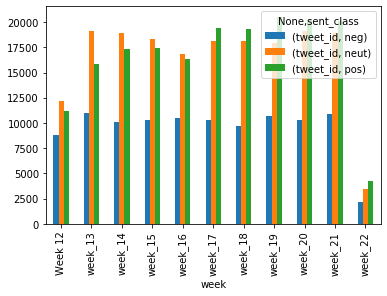

In [30]:
grouped.count().unstack().plot(kind='bar')

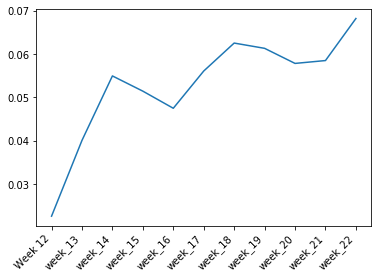

In [23]:
grouped = classified_tweet_df[['week','sentiment']].groupby(['week'])
plt.plot(grouped.mean())
plt.xticks(rotation=45, ha='right')
plt.show()

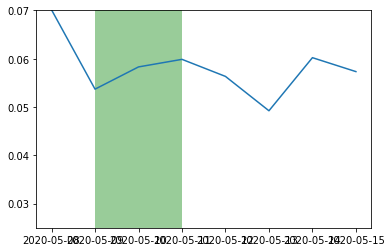

In [15]:
checkx = [True if (x >= '2020-05-09' and x < '2020-05-12') else False for x in grouped.mean().index]
fig,ax = plt.subplots()
ax.set_ylim([0.025,0.07])
ax.plot(grouped.mean())
theta = '2020-05-09'
ax.fill_between(grouped.mean().index, 0,0.1, where=checkx, facecolor='green', alpha=0.4)
#ax.hlines(0.03,'2020-05-09','2020-05-12',color='g',label='Lockdown starts')
plt.show()

## Candle Plot with moving average 

In [32]:
def clean_tweets(tweet):
    stop_words = set(STOPWORDS)
    alphabets = set(string.ascii_lowercase)
    tweet = tweet.lower()
    #after tweet preprocessing the colon symbol left remain
    tweet = re.sub(r'‚Ä¶', '', tweet)
    #replacing the user tagging 
    tweet = re.sub(r'@([^\s]+)', ' ', tweet)
    #replace the URLs
    tweet = re.sub(r'http[s]?[:]?[\s]?\/\/(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',' ',tweet)
    #replace the n't
    tweet = re.sub(r'n\'t', ' not', tweet)
    #replace the 's'
    tweet = re.sub(r'\'s', '', tweet)
    #replace the numbers
    tweet = re.sub(r'\d', '', tweet)
    #replace the dots
    tweet = re.sub(r'…', '', tweet)

    exclude = set(string.punctuation).union(set(['’','…','``','...','“','‘','”']))

    word_tokens = word_tokenize(tweet)
    #filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens]
    filtered_tweet = []
    #looping through conditions
    for w in word_tokens:
    #check tokens against stop words and punctuations
        if w not in exclude and w not in ('rt','…',) and w not in stop_words and w not in alphabets:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)

In [33]:
tm_tweet_df = pd.read_csv('TweetMar20_May26_1.csv')
tm_tweet_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
tm_tweet_df.tweet = tm_tweet_df.tweet.map(clean_tweets)
tm_tweet_df.to_csv('cleantweetMar20_May26.csv')

In [16]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d')
ax.xaxis.set_major_formatter(myFmt)


In [34]:
work_tweet_df = pd.read_csv('TweetMar20_May26onlywork.csv')

In [36]:
work_tweet_df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1,inplace=True)

In [48]:
work_tweet_df[work_tweet_df['location']=='united states']

,Date,hashtags,location,sentiment,tweet,tweet_id,sent_class,week
14,2020-05-21 11:59:09+00:00,NaN,united states,0.000000,RT @ProgressCanada_: 4 Day Work Week Now,1.263439e+18,neut,week_21
16,2020-05-22 00:16:09+00:00,NaN,united states,0.000000,"RT @MarkWarner: The proposal Bernie, @SenDougJ...",1.263625e+18,neut,week_21
17,2020-05-21 22:49:49+00:00,Covid19,united states,-0.133333,RT @CLARESAMBROOK: @meenalsworld At least 222 ...,1.263603e+18,neg,week_21
20,2020-05-21 05:58:41+00:00,NaN,united states,0.000000,"RT @dandrezner: Look, this is what white, work...",1.263348e+18,neut,week_21
24,2020-05-21 09:45:25+00:00,NaN,united states,0.300000,RT @Appian: See how we can help your organizat...,1.263406e+18,pos,week_21
...,...,...,...,...,...,...,...,...
39112,2020-05-20 21:07:43+00:00,NaN,united states,0.500000,RT @pollreport: Regardless of how you intend t...,1.263215e+18,pos,week_21
39120,2020-05-20 13:31:09+00:00,NaN,united states,-0.020833,RT @politico: A survey of more than 500 minori...,1.263100e+18,neg,week_21
39121,2020-05-20 15:09:19+00:00,NaN,united states,0.090000,@jwgop @ProjectLincoln @TheRickWilson @reedgal...,1.263125e+18,pos,week_21
39123,2020-05-20 20:34:31+00:00,NaN,united states,-0.125000,RT @Stephaniejing2: BREAKING - FedEx fired the...,1.263206e+18,neg,week_21


In [42]:
english_tweet_df = pd.read_csv('TweetMar20_May26_1.csv')

In [43]:
english_tweet_df[]

(543026, 10)

In [45]:
tweet_df  = pd.read_csv('TweetsMar20_May26.csv') 

In [47]:
tweet_df[tweet_df['location']=='united states']

,Unnamed: 0,Date,hashtags,location,sentiment,tweet,tweet_id,sent_class
3,3,2020-05-21 19:30:53+00:00,NaN,united states,0.136364,RT @FabricationMsm: @horatioharry @PaulBrandIT...,1.263553e+18,pos
9,9,2020-05-22 01:50:06+00:00,NaN,united states,-0.250000,@support_a_teach @LinkedIn It is almost that t...,1.263648e+18,neg
15,15,2020-05-21 19:17:10+00:00,NaN,united states,-0.187500,"RT @brianschatz: A little context, from the in...",1.263549e+18,neg
38,43,2020-05-21 17:39:47+00:00,NaN,united states,-0.325000,Idiot Tump turns against Canada. Reason big ...,1.263525e+18,neg
40,45,2020-05-21 19:24:06+00:00,NaN,united states,-0.205556,SC Transportation officials said South Carolin...,1.263551e+18,neg
...,...,...,...,...,...,...,...,...
543006,622874,2020-05-20 19:11:21+00:00,COVID19,united states,-0.051768,RT @AFB1921: The #COVID19 pandemic is hard for...,1.263186e+18,neg
543009,622877,2020-05-20 16:48:47+00:00,NaN,united states,0.000000,RT @woodruffbets: Scoop: Multiple US Attorneys...,1.263150e+18,neut
543011,622879,2020-05-20 23:25:09+00:00,NaN,united states,-0.500000,RT @Pat_Francis: VP @Mike_Pence PUTS SECRET SE...,1.263249e+18,neg
543016,622886,2020-05-20 09:19:28+00:00,NaN,united states,0.150000,RT @DocMellyMel: LAPD already eats up 53% of L...,1.263037e+18,pos
